In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_entities = "/content/drive/MyDrive//SROIE2019/train/entities"
test_entities = "/content/drive/MyDrive//SROIE2019/test/entities"

In [ ]:
# Import required libraries
from collections import Counter
from sklearn.model_selection import train_test_split

import os
import json
import pandas as pd

In [ ]:
# Load training entities
train_records = []

for file in os.listdir(train_entities):
    if file.endswith(".txt"):
        with open(os.path.join(train_entities, file), "r", encoding="utf-8") as f:
            data = json.load(f)

        train_records.append({
            "file_id": file,
            "entities": data
        })

# Convert to DataFrame for analysis
train_df = pd.DataFrame(train_records)

In [ ]:
# Load testing entities
test_records = []

for file in os.listdir(test_entities):
    if file.endswith(".txt"):
        with open(os.path.join(test_entities, file), "r", encoding="utf-8") as f:
            data = json.load(f)

        test_records.append({
            "file_id": file,
            "entities": data
        })

# Convert to DataFrame for analysis
test_df = pd.DataFrame(test_records)

In [ ]:
# Verify that the predefined train/test split has no overlap
set(train_df["file_id"]).intersection(set(test_df["file_id"]))

set()

In [ ]:
# Count how many entity fields each receipt has
# This checks whether the data structure is consistent
train_df["train_num_entities"] = train_df["entities"].apply(len)
test_df["test_num_entities"] = test_df["entities"].apply(len)

print("Train set:")
print(train_df["train_num_entities"].describe())

print("\nTest set:")
print(test_df["test_num_entities"].describe())

Train set:
count    626.000000
mean       3.998403
std        0.039968
min        3.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        4.000000
Name: train_num_entities, dtype: float64

Test set:
count    347.0
mean       4.0
std        0.0
min        4.0
25%        4.0
50%        4.0
75%        4.0
max        4.0
Name: test_num_entities, dtype: float64


In [ ]:
train_keys = Counter()
for d in train_df["entities"]:
    train_keys.update(d.keys())

test_keys = Counter()
for d in test_df["entities"]:
    test_keys.update(d.keys())

print("Entity counts in TRAIN set:")
print(train_keys)

print("\nEntity counts in TEST set:")
print(test_keys)

Entity counts in TRAIN set:
Counter({'company': 626, 'date': 626, 'total': 626, 'address': 625})

Entity counts in TEST set:
Counter({'company': 347, 'date': 347, 'address': 347, 'total': 347})


In [ ]:
# Check how often each entity field appears
# To identify missing values
print("\nEntity presence rate in TRAIN set:")
for key in train_keys:
    print(key, train_df["entities"].apply(lambda x: key in x).mean())

print("\nEntity presence rate in TEST set:")
for key in test_keys:
    print(key, test_df["entities"].apply(lambda x: key in x).mean())


Entity presence rate in TRAIN set:
company 1.0
date 1.0
address 0.9984025559105432
total 1.0

Entity presence rate in TEST set:
company 1.0
date 1.0
address 1.0
total 1.0


In [ ]:
# Check for duplicate receipts using unique file IDs
print("Duplicate files in TRAIN:", train_df["file_id"].duplicated().sum())
print("Duplicate files in TEST:", test_df["file_id"].duplicated().sum())

Duplicate files in TRAIN: 0
Duplicate files in TEST: 0


In [ ]:
# Analyze the length of address text to understand text variability
train_df["address_len"] = train_df["entities"].apply(
    lambda x: len(x["address"]) if "address" in x else 0
)

test_df["address_len"] = test_df["entities"].apply(
    lambda x: len(x["address"]) if "address" in x else 0
)

print("\nAddress length statistics (TRAIN):")
print(train_df["address_len"].describe())

print("\nAddress length statistics (TEST):")
print(test_df["address_len"].describe())


Address length statistics (TRAIN):
count    626.000000
mean      70.722045
std       17.742317
min        0.000000
25%       56.000000
50%       72.000000
75%       85.000000
max      135.000000
Name: address_len, dtype: float64

Address length statistics (TEST):
count    347.000000
mean      69.121037
std       17.520831
min       10.000000
25%       54.000000
50%       69.000000
75%       81.000000
max      111.000000
Name: address_len, dtype: float64


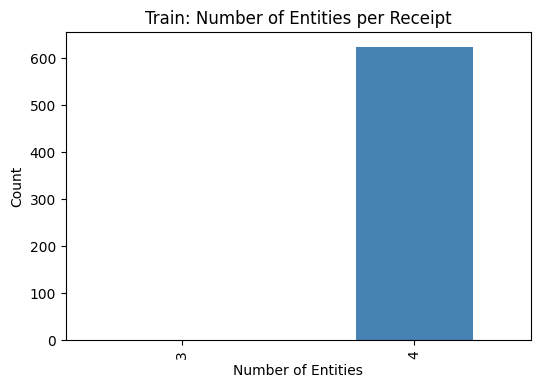

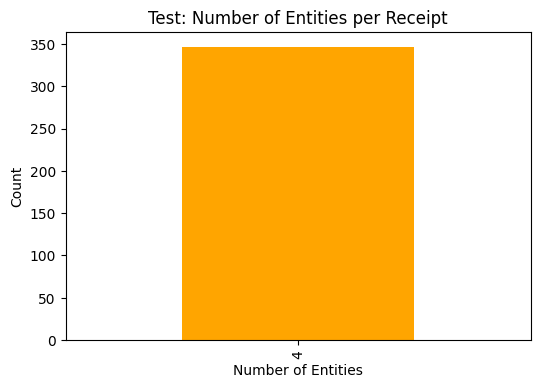

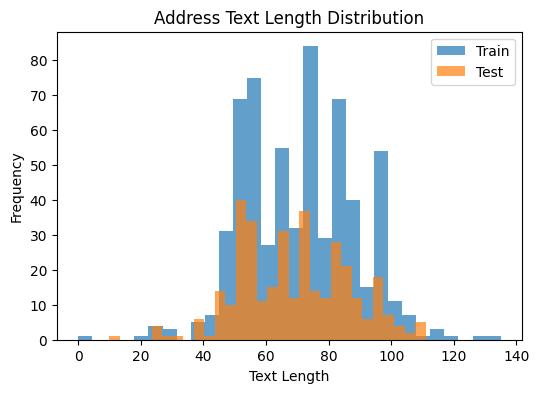

In [ ]:
import matplotlib.pyplot as plt

# Number of entities per receipt (Train & Test)
train_df["train_num_entities"] = train_df["entities"].apply(len)
test_df["test_num_entities"] = test_df["entities"].apply(len)

plt.figure(figsize=(6, 4))

train_df["train_num_entities"].value_counts().sort_index().plot(
    kind="bar", color="steelblue", label="Train"
)

plt.title("Train: Number of Entities per Receipt")
plt.xlabel("Number of Entities")
plt.ylabel("Count")
plt.show()


plt.figure(figsize=(6, 4))

test_df["test_num_entities"].value_counts().sort_index().plot(
    kind="bar", color="orange", label="Test"
)

plt.title("Test: Number of Entities per Receipt")
plt.xlabel("Number of Entities")
plt.ylabel("Count")
plt.show()

# Address text length distribution (Train & Test)
train_df["address_len"] = train_df["entities"].apply(
    lambda x: len(x["address"]) if "address" in x else 0
)

test_df["address_len"] = test_df["entities"].apply(
    lambda x: len(x["address"]) if "address" in x else 0
)

plt.figure(figsize=(6, 4))
train_df["address_len"].plot(kind="hist", bins=30, alpha=0.7, label="Train")
test_df["address_len"].plot(kind="hist", bins=30, alpha=0.7, label="Test")

plt.title("Address Text Length Distribution")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
# Count how many receipts are missing the address field
train_df["entities"].apply(lambda x: "address" not in x).sum()

np.int64(1)

In [ ]:
# Handle missing address values by filling with empty strings
train_df["entities"] = train_df["entities"].apply(
    lambda x: {**x, "address": x.get("address", "")}
)

# Check the result after cleaning
print("Entity counts in TRAIN set after cleaning:")
print(train_keys)

Entity counts in TRAIN set after cleaning:
Counter({'company': 626, 'date': 626, 'address': 626, 'total': 626})
